In [20]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv" , delimiter = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isna().sum()
#no na's

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#drop duration coloumn
df = df.drop(columns= "duration")


In [6]:
#one-hot encoding for label
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
#get dummies for categorical variables
features = [ "job",
             "marital",
             "education",
             "default",
             "housing",
             "loan",
             "contact",
             "month",
             "day_of_week",
            "poutcome"
            ]
df= pd.get_dummies(df , columns = features )
df.shape



(41188, 63)

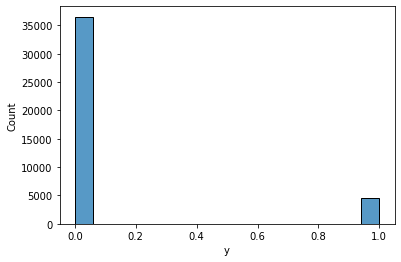

In [12]:
#plotting histogram of label
plot1 = sns.histplot(df , x="y" )
plot1

In [ ]:
#measure imbalance
y_imb = 

In [10]:
features2 = ['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success'
             
             ]

x_df = df[features2].copy()
x_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [11]:
x_df.shape

(41188, 62)

In [12]:
y_df = df["y"].copy()

In [13]:
#train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_df , y_df , stratify = y_df , test_size = 0.20 , random_state = 50)

In [14]:
#stratified
unique_train , count_train = np.unique(y_train , return_counts=True)
unique_test , count_test = np.unique(y_test , return_counts= True)

In [15]:
count_train[1]/count_train[0]

0.12695806826732334

In [16]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
print("Dummy ACC: %.2f" % acc(y_train, dummy_clf.predict(x_train)))

Dummy ACC: 0.80


In [19]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [21]:
#training classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring=make_scorer(acc))  # cross-validation


ACC: 0.90 +/- 0.00


In [23]:
f1_score = cross_val_score(clf , x_train , y_train , cv=10 , scoring= make_scorer(f1))


array([0.21973094, 0.26666667, 0.21363636, 0.25892857, 0.21218962,
       0.28125   , 0.35095137, 0.23370787, 0.24886878, 0.24282561])

In [24]:
print("ACC: %.2f +/- %.2f" % (f1_score.mean(), f1_score.std()))

ACC: 0.25 +/- 0.04


In [25]:
clf_600 = RandomForestClassifier(n_estimators=400 , max_depth= 6)
f1_600 = cross_val_score(clf_600 , x_train, y_train , cv = 10 , scoring = make_scorer(f1))


ACC: 0.90 +/- 0.00


In [26]:
print("ACC: %.2f +/- %.2f" % (f1_600.mean(), f1_600.std()))

ACC: 0.28 +/- 0.04


In [27]:
clf_rs = RandomForestClassifier(n_estimators=1000 , max_depth= 8 , random_state= 60)
f1_rs = cross_val_score(clf_rs , x_train, y_train , cv = 10 , scoring = make_scorer(f1))
print("ACC: %.2f +/- %.2f" % (f1_rs.mean(), f1_rs.std()))

ACC: 0.30 +/- 0.05


In [29]:
#finding better parameters for random forest

#specifying parameters
params = {
    'n_estimators' : [100,300,500,1000],
    'max_depth' : [2,3,4,5]
}

In [31]:
#grid search for these parameters
grid_search = GridSearchCV(estimator= clf , param_grid= params , cv = 3)


In [33]:
grid_search.fit(x_train ,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [34]:
#best parameters?
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [36]:
#best estimator?
best_estimator = grid_search.best_estimator_

In [37]:
#accuracy scores for the best parameters.
grid_search.best_score_

0.8991806169710689

In [41]:
#fitting the model with best paramaters to the training data
clf_best = RandomForestClassifier(n_estimators=300, max_depth=5)
clf_best.fit(x_train , y_train)
print("Random Forest ACC = %.2f" % acc(y_train, clf_best.predict(x_train)))

Random Forest ACC = 0.90


In [46]:
#top three feaatures?
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features2[indices[f]],  importances[indices[f]]))

[ 8  7  4  2 61  6  5  3  0 49 60 52 59 42 43 50 44 53 33 17 48 34  1 14
 55 10 46 47 51 45 31 23 27 58 54 22 56 57 28 18  9 16 25 36 39 30 38 21
 41 32 26 20 15 13 12 11 37 40 19 24 29 35]
Feature ranking:
1. nr.employed (0.180222)
2. euribor3m (0.162400)
3. emp.var.rate (0.111745)
4. pdays (0.107612)
5. poutcome_success (0.103121)
6. cons.conf.idx (0.071593)
7. cons.price.idx (0.065424)
8. previous (0.026830)
9. age (0.020447)
10. month_mar (0.018167)
11. poutcome_nonexistent (0.016078)
12. month_oct (0.013568)
13. poutcome_failure (0.013002)
14. contact_cellular (0.012610)
15. contact_telephone (0.012236)
16. month_may (0.008234)
17. month_apr (0.006449)
18. month_sep (0.006060)
19. default_no (0.004257)
20. job_student (0.003256)
21. month_jun (0.003156)
22. default_unknown (0.003074)
23. campaign (0.002656)
24. job_retired (0.002646)
25. day_of_week_mon (0.002634)
26. job_blue-collar (0.002360)
27. month_dec (0.001972)
28. month_jul (0.001789)
29. month_nov (0.001331)
30. month_au

In [ ]:
#top 3 features
#1. nr.employed 
#2. euribor3m 
#3. emp.var.rate 

In [51]:
clf_best.score(x_test , y_test)

0.9017965525613013

In [30]:
clf_bf = RandomForestClassifier(n_estimators=100 , max_depth= 10 , random_state= 60)
clf_bf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [31]:
importances = clf_bf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_bf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features2[indices[f]],  importances[indices[f]]))

[ 7  8  2 61  4  6  5  0  3  1 59 49 60 50 52 43 42 55 44 31 10 48 57 54
 23 38 36 22 58 14 56 33 28  9 30 53 17 39 41 18 27 34 25 21 32 45 16 51
 47 13 26 19 46 37 12 15 40 20 11 24 29 35]
Feature ranking:
1. euribor3m (0.151577)
2. nr.employed (0.134084)
3. pdays (0.080227)
4. poutcome_success (0.078047)
5. emp.var.rate (0.070825)
6. cons.conf.idx (0.068137)
7. cons.price.idx (0.048333)
8. age (0.047638)
9. previous (0.033972)
10. campaign (0.017042)
11. poutcome_failure (0.016215)
12. month_mar (0.015479)
13. poutcome_nonexistent (0.014994)
14. month_may (0.013652)
15. month_oct (0.013382)
16. contact_telephone (0.012663)
17. contact_cellular (0.012600)
18. day_of_week_mon (0.008250)
19. month_apr (0.007113)
20. education_university.degree (0.006552)
21. job_blue-collar (0.006280)
22. month_jun (0.005714)
23. day_of_week_tue (0.005641)
24. day_of_week_fri (0.005623)
25. marital_single (0.005510)
26. housing_yes (0.005335)
27. housing_no (0.005321)
28. marital_married (0.005246)
29. 